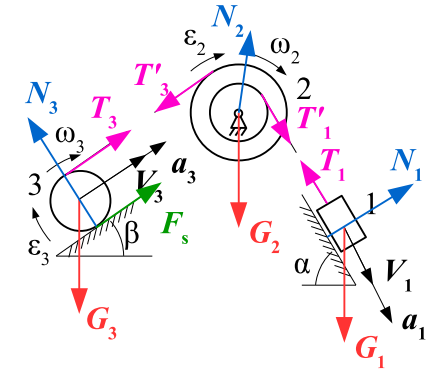

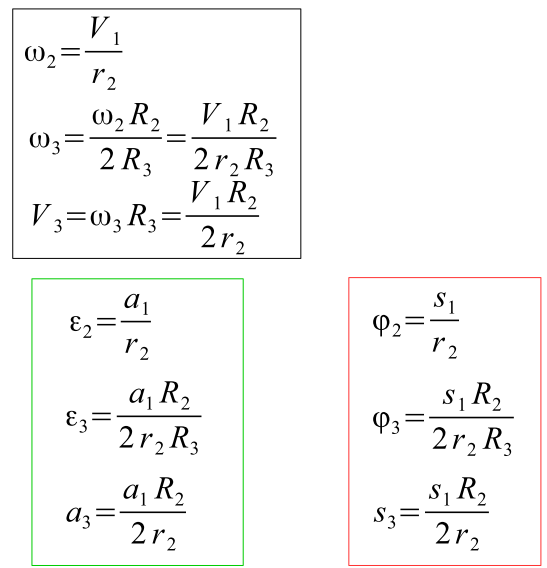

## Задача 2

In [ ]:
from sympy.physics.mechanics import init_vprinting
init_vprinting()

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle

In [ ]:
t = Symbol('t')
x1 = Function('x1')(t)
phi2 = Function('phi2')(t)
x3 = Function('x3')(t)
phi3 = Function('phi3')(t)

g = Symbol('g')
m1,m2,m3 = Symbol('m1'),Symbol('m2'),Symbol('m3')
r2 = Symbol('r2')
R2,R3 = Symbol('R2'), Symbol('R3')
T1,T3,Fs = Symbol('T1'),Symbol('T3'),Symbol('Fs')
J2 = 1/2 * m2* R2**2
J3 = 1/2 * m3* R3**2
al,be = Symbol('alpha'),Symbol('beta')


In [ ]:
Eqnarray_full = [Eq(m1*sp.diff(x1,t,2),g*m1*sin(al)-T1),
            Eq(J2*sp.diff(phi2,t,2),T1*r2 - T3*R2),
            Eq(m3*sp.diff(x3,t,2),-g*m3*sin(be)+T3+Fs),
            Eq(J3*sp.diff(phi3,t,2),T3*R3-Fs*R3),
            Eq(sp.diff(phi2,t,2),sp.diff(x1,t,2)/r2),
            Eq(sp.diff(phi3,t,2),sp.diff(x1,t,2)*R2/(2*r2*R3)),
            Eq(sp.diff(x3,t,2),sp.diff(x1,t,2)*R2/(2*r2))
            ]
for i in range(len(Eqnarray_full)):
  display(Eqnarray_full[i])

m₁⋅x₁̈ = -T₁ + g⋅m₁⋅sin(α)

      2                       
0.5⋅R₂ ⋅m₂⋅φ₂̈ = -R₂⋅T₃ + T₁⋅r₂

m₃⋅x₃̈ = Fs + T₃ - g⋅m₃⋅sin(β)

      2                       
0.5⋅R₃ ⋅m₃⋅φ₃̈ = -Fs⋅R₃ + R₃⋅T₃

     x₁̈
φ₂̈ = ──
     r₂

      R₂⋅x₁̈
φ₃̈ = ───────
     2⋅R₃⋅r₂

     R₂⋅x₁̈
x₃̈ = ─────
      2⋅r₂

In [ ]:
xxx = sp.solve(Eqnarray_full,[sp.diff(x1,t,2),T1,T3,Fs,sp.diff(phi2,t,2),sp.diff(phi3,t,2),sp.diff(x3,t,2)])
for i in xxx.keys():
  display(Eq(i,xxx[i]))

           2                    2     2                                       
     2.0⋅R₂ ⋅g⋅m₂⋅m₃⋅sin(β) + R₂ ⋅g⋅m₃ ⋅sin(β) + R₂⋅g⋅m₁⋅m₃⋅r₂⋅sin(α) + 4.0⋅g⋅
Fs = ─────────────────────────────────────────────────────────────────────────
                                      2            2               2          
                                4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂           

        2       
m₁⋅m₃⋅r₂ ⋅sin(β)
────────────────
                
                

           2                        2                                         
     4.0⋅R₂ ⋅g⋅m₁⋅m₂⋅sin(α) + 3.0⋅R₂ ⋅g⋅m₁⋅m₃⋅sin(α) + 4.0⋅R₂⋅g⋅m₁⋅m₃⋅r₂⋅sin(β
T₁ = ─────────────────────────────────────────────────────────────────────────
                              2            2               2                  
                        4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂                   

 
)
─
 
 

           2                                                           2      
     2.0⋅R₂ ⋅g⋅m₂⋅m₃⋅sin(β) + 3.0⋅R₂⋅g⋅m₁⋅m₃⋅r₂⋅sin(α) + 4.0⋅g⋅m₁⋅m₃⋅r₂ ⋅sin(β
T₃ = ─────────────────────────────────────────────────────────────────────────
                              2            2               2                  
                        4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂                   

 
)
─
 
 

     -4.0⋅R₂⋅g⋅m₃⋅sin(β) + 8.0⋅g⋅m₁⋅r₂⋅sin(α)
φ₂̈ = ────────────────────────────────────────
             2            2               2  
       4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂   

             2                                    
     - 2.0⋅R₂ ⋅g⋅m₃⋅sin(β) + 4.0⋅R₂⋅g⋅m₁⋅r₂⋅sin(α)
φ₃̈ = ─────────────────────────────────────────────
           2               2                     2
     4.0⋅R₂ ⋅R₃⋅m₂ + 3.0⋅R₂ ⋅R₃⋅m₃ + 8.0⋅R₃⋅m₁⋅r₂ 

                                         2       
     -4.0⋅R₂⋅g⋅m₃⋅r₂⋅sin(β) + 8.0⋅g⋅m₁⋅r₂ ⋅sin(α)
x₁̈ = ────────────────────────────────────────────
               2            2               2    
         4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂     

             2                                    
     - 2.0⋅R₂ ⋅g⋅m₃⋅sin(β) + 4.0⋅R₂⋅g⋅m₁⋅r₂⋅sin(α)
x₃̈ = ─────────────────────────────────────────────
                2            2               2    
          4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂     

In [ ]:
sp.classify_ode(Eq(sp.diff(x1,t,2),xxx[sp.diff(x1,t,2)]), x1)

('factorable',
 'nth_algebraic',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_euler_eq_nonhomogeneous_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'nth_algebraic_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters_Integral',
 '2nd_nonlinear_autonomous_conserved',
 '2nd_nonlinear_autonomous_conserved_Integral')

In [ ]:
res = sp.dsolve(Eq(sp.diff(x1,t,2),xxx[sp.diff(x1,t,2)]), x1, hint="nth_linear_constant_coeff_undetermined_coefficients")
display(res)

                       2                                       
                 g⋅r₂⋅t ⋅(-2.0⋅R₂⋅m₃⋅sin(β) + 4.0⋅m₁⋅r₂⋅sin(α))
x₁ = C₁ + C₂⋅t + ──────────────────────────────────────────────
                            2            2               2     
                      4.0⋅R₂ ⋅m₂ + 3.0⋅R₂ ⋅m₃ + 8.0⋅m₁⋅r₂      